In [ ]:
pip install tensorflow

Load Your Image

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.H7I3IL_0.2.0/stanford_dogs-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.H7I3IL_0.2.0/stanford_dogs-test.tfrecord*...:   0…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


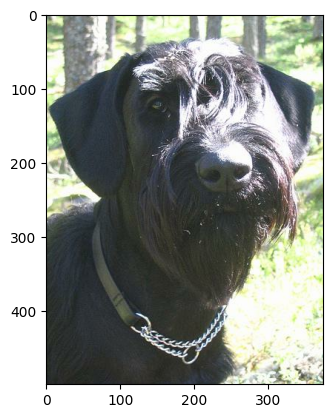

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load a sample image
doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(image)
    plt.show()

Flip the Image

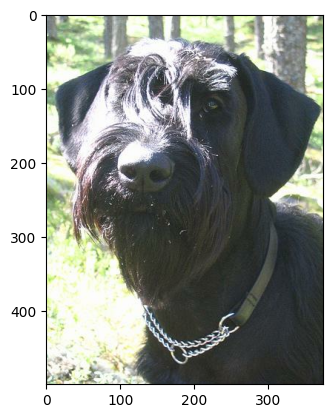

In [3]:
def flip_image(image):
    return tf.image.flip_left_right(image)

flipped_image = flip_image(image)
plt.imshow(flipped_image)
plt.show()


Rotate the Image

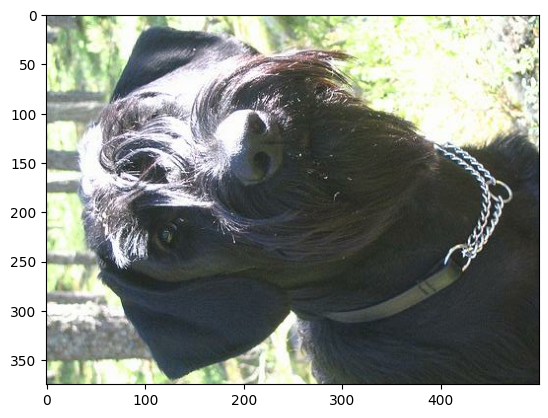

In [4]:
def rotate_image(image):
    return tf.image.rot90(image)

rotated_image = rotate_image(image)
plt.imshow(rotated_image)
plt.show()


Shear the Image

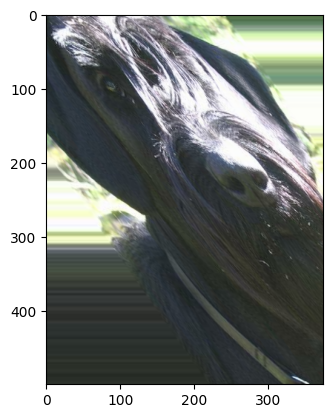

In [5]:
def shear_image(image, intensity):
    image = tf.keras.preprocessing.image.img_to_array(image)
    sheared_image = tf.keras.preprocessing.image.random_shear(image, intensity=intensity, row_axis=0, col_axis=1, channel_axis=2)
    return tf.convert_to_tensor(sheared_image, dtype=tf.float32)

sheared_image = shear_image(image, 50)
plt.imshow(tf.cast(sheared_image, tf.uint8))
plt.show()


Change Brightness


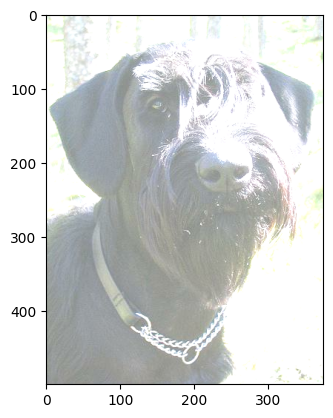

In [6]:
def change_brightness(image, max_delta):
    return tf.image.random_brightness(image, max_delta)

brightened_image = change_brightness(image, 0.5)
plt.imshow(tf.cast(brightened_image, tf.uint8))
plt.show()


Change Hue

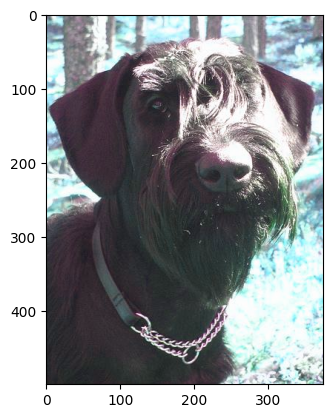

In [7]:
def change_hue(image, delta):
    return tf.image.adjust_hue(image, delta)

hue_changed_image = change_hue(image, 0.3)
plt.imshow(tf.cast(hue_changed_image, tf.uint8))
plt.show()


*Putting It All Together*   

Now, let's combine all these transformations into a single function to create a truly augmented image:



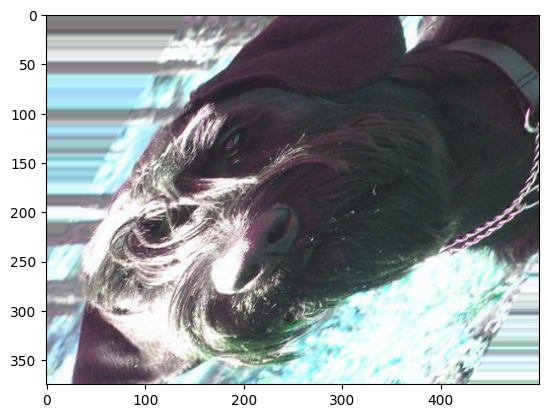

In [8]:
def augment_image(image):
    image = flip_image(image)
    image = rotate_image(image)
    image = shear_image(image, 50)
    image = change_brightness(image, 0.5)
    image = change_hue(image, 0.3)
    return image

augmented_image = augment_image(image)
plt.imshow(tf.cast(augmented_image, tf.uint8))
plt.show()
